In [3]:
# Import necessary libraries
import pandas as pd
from google.colab import files
import plotnine as p9
import plotly.express as px

# Upload the CSV file from local system
uploaded = files.upload()

# Read the uploaded CSV into a DataFrame
df = pd.read_csv('2019.csv')

# Display the first few rows of the dataset
print("Head of the dataset:")
print(df.head())

# Show dataset information including data types and missing values
print("\nDataset info:")
print(df.info())

# Show basic statistics for numerical columns
print("\nStatistical summary:")
print(df.describe())


Saving 2019.csv to 2019.csv
Head of the dataset:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  

In [4]:
# Remove leading/trailing spaces and convert country names to title case for consistency
df['Country or region'] = df['Country or region'].str.strip().str.title()

# Rename columns to snake_case for easier access in code
df.rename(columns={
    'Overall rank': 'overall_rank',
    'Country or region': 'country',
    'Score': 'score',
    'GDP per capita': 'gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
}, inplace=True)

# Check and remove duplicate rows if any
df = df.drop_duplicates()

# Replace zero values in selected numeric columns with NaN (if zero is not a valid value)
cols_to_check = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'corruption']
df[cols_to_check] = df[cols_to_check].replace(0, pd.NA)

# Optional: convert 'country' column to categorical to save memory and improve performance
df['country'] = df['country'].astype('category')

# Display updated info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   overall_rank             156 non-null    int64   
 1   country                  156 non-null    category
 2   score                    156 non-null    float64 
 3   gdp_per_capita           155 non-null    object  
 4   social_support           155 non-null    object  
 5   healthy_life_expectancy  155 non-null    object  
 6   freedom                  155 non-null    object  
 7   generosity               155 non-null    object  
 8   corruption               155 non-null    object  
dtypes: category(1), float64(1), int64(1), object(6)
memory usage: 15.5+ KB


In [5]:
# Convert object columns back to numeric (float) after replacing 0 with NA
numeric_cols = [
    'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
    'freedom', 'generosity', 'corruption'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   overall_rank             156 non-null    int64   
 1   country                  156 non-null    category
 2   score                    156 non-null    float64 
 3   gdp_per_capita           155 non-null    float64 
 4   social_support           155 non-null    float64 
 5   healthy_life_expectancy  155 non-null    float64 
 6   freedom                  155 non-null    float64 
 7   generosity               155 non-null    float64 
 8   corruption               155 non-null    float64 
dtypes: category(1), float64(7), int64(1)
memory usage: 15.5 KB


In [6]:
# Display the shape of the dataset
print("Shape of the dataset:")
print(df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Summary statistics for all numeric columns
print("\nDescriptive statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Unique values in 'country'
print("\nNumber of unique countries:")
print(df['country'].nunique())

# Top 10 happiest countries
print("\nTop 10 happiest countries:")
print(df.sort_values(by='score', ascending=False)[['country', 'score']].head(10))

# Bottom 10 countries
print("\nBottom 10 countries:")
print(df.sort_values(by='score', ascending=True)[['country', 'score']].head(10))

# Correlation matrix
print("\nCorrelation matrix:")
print(df.corr(numeric_only=True))

Shape of the dataset:
(156, 9)

Column names:
['overall_rank', 'country', 'score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'corruption']

Descriptive statistics:
       overall_rank       score  gdp_per_capita  social_support  \
count    156.000000  156.000000      155.000000      155.000000   
mean      78.500000    5.407096        0.910987        1.216613   
std       45.177428    1.113120        0.392925        0.283808   
min        1.000000    2.853000        0.026000        0.378000   
25%       39.750000    4.544500        0.615000        1.057000   
50%       78.500000    5.379500        0.960000        1.274000   
75%      117.250000    6.184500        1.234000        1.453000   
max      156.000000    7.769000        1.684000        1.624000   

       healthy_life_expectancy     freedom  generosity  corruption  
count               155.000000  155.000000  155.000000  155.000000  
mean                  0.729923    0.395103    0.

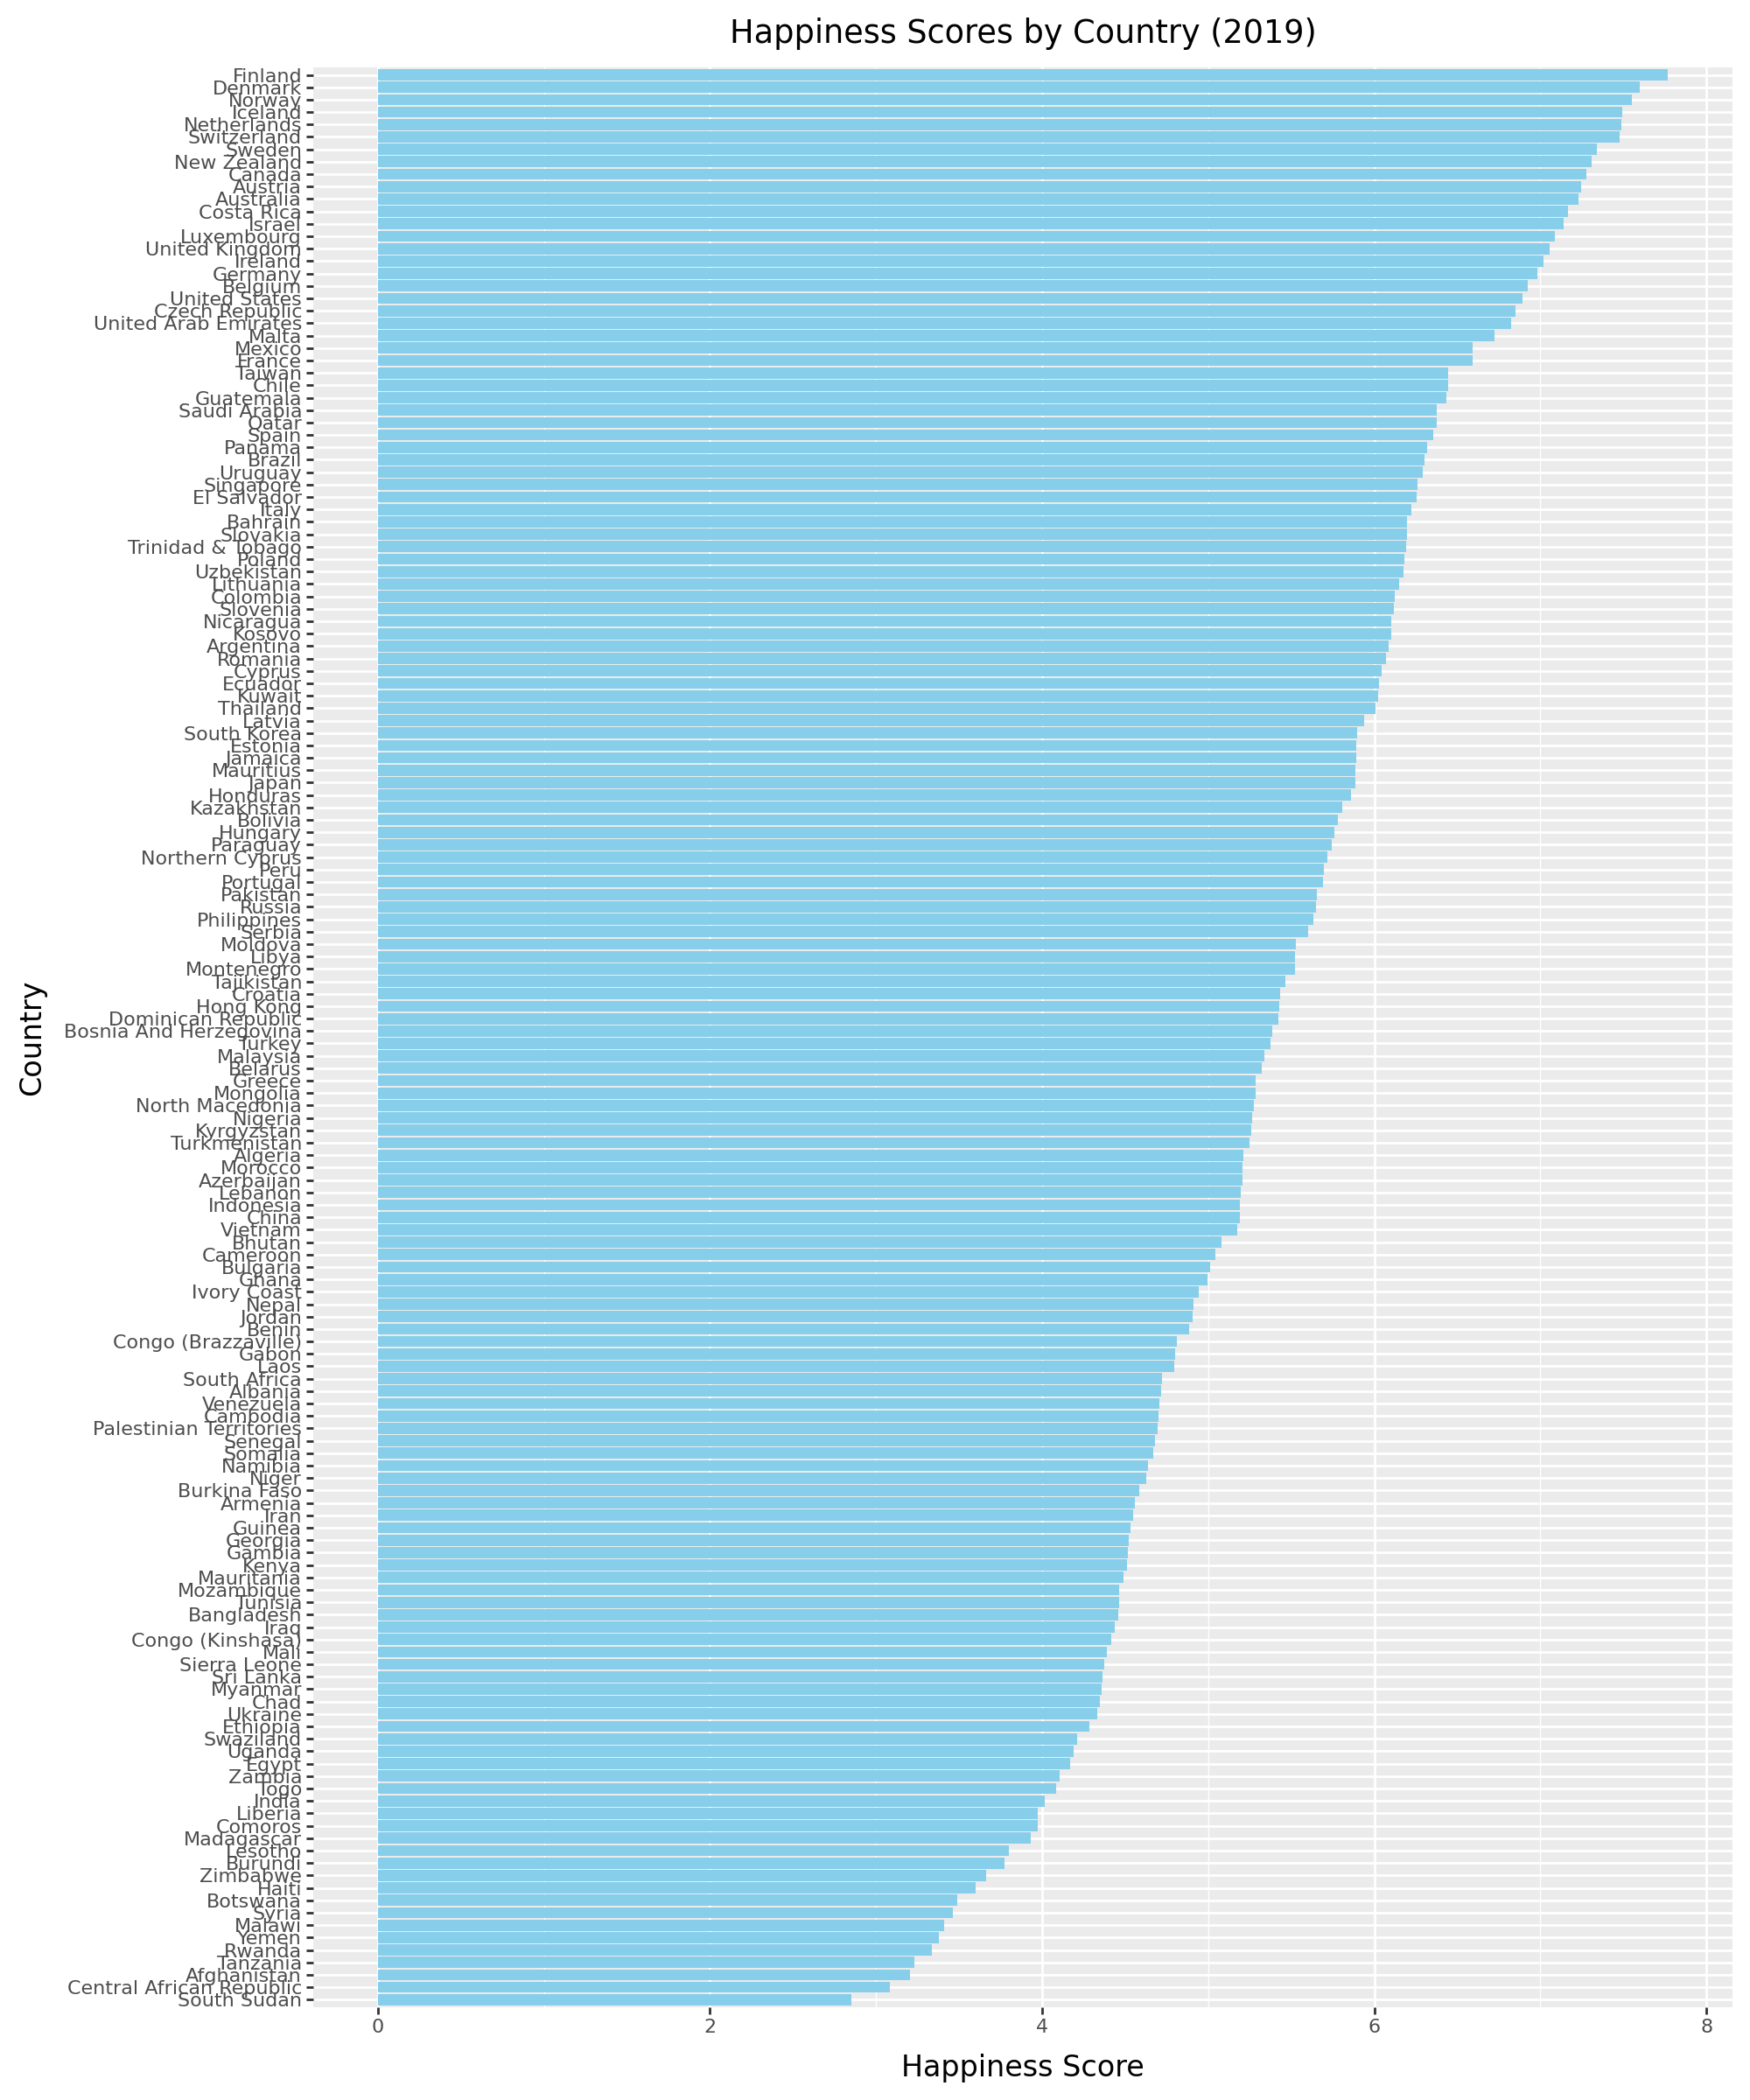

In [13]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, coord_flip, labs, geom_point, geom_boxplot

# Sort data by score for better visualization
df_sorted = df.sort_values(by='score', ascending=False)

# Create bar chart
(
    ggplot(df_sorted, aes(x='reorder(country, score)', y='score')) +
    geom_bar(stat='identity', fill='skyblue') +
    coord_flip() +
    labs(
        title='Happiness Scores by Country (2019)',
        x='Country',
        y='Happiness Score'
    ) +
    theme(
        figure_size=(10, 12),
        axis_title=element_text(size=12),
        axis_text=element_text(size=8)
    )
)


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


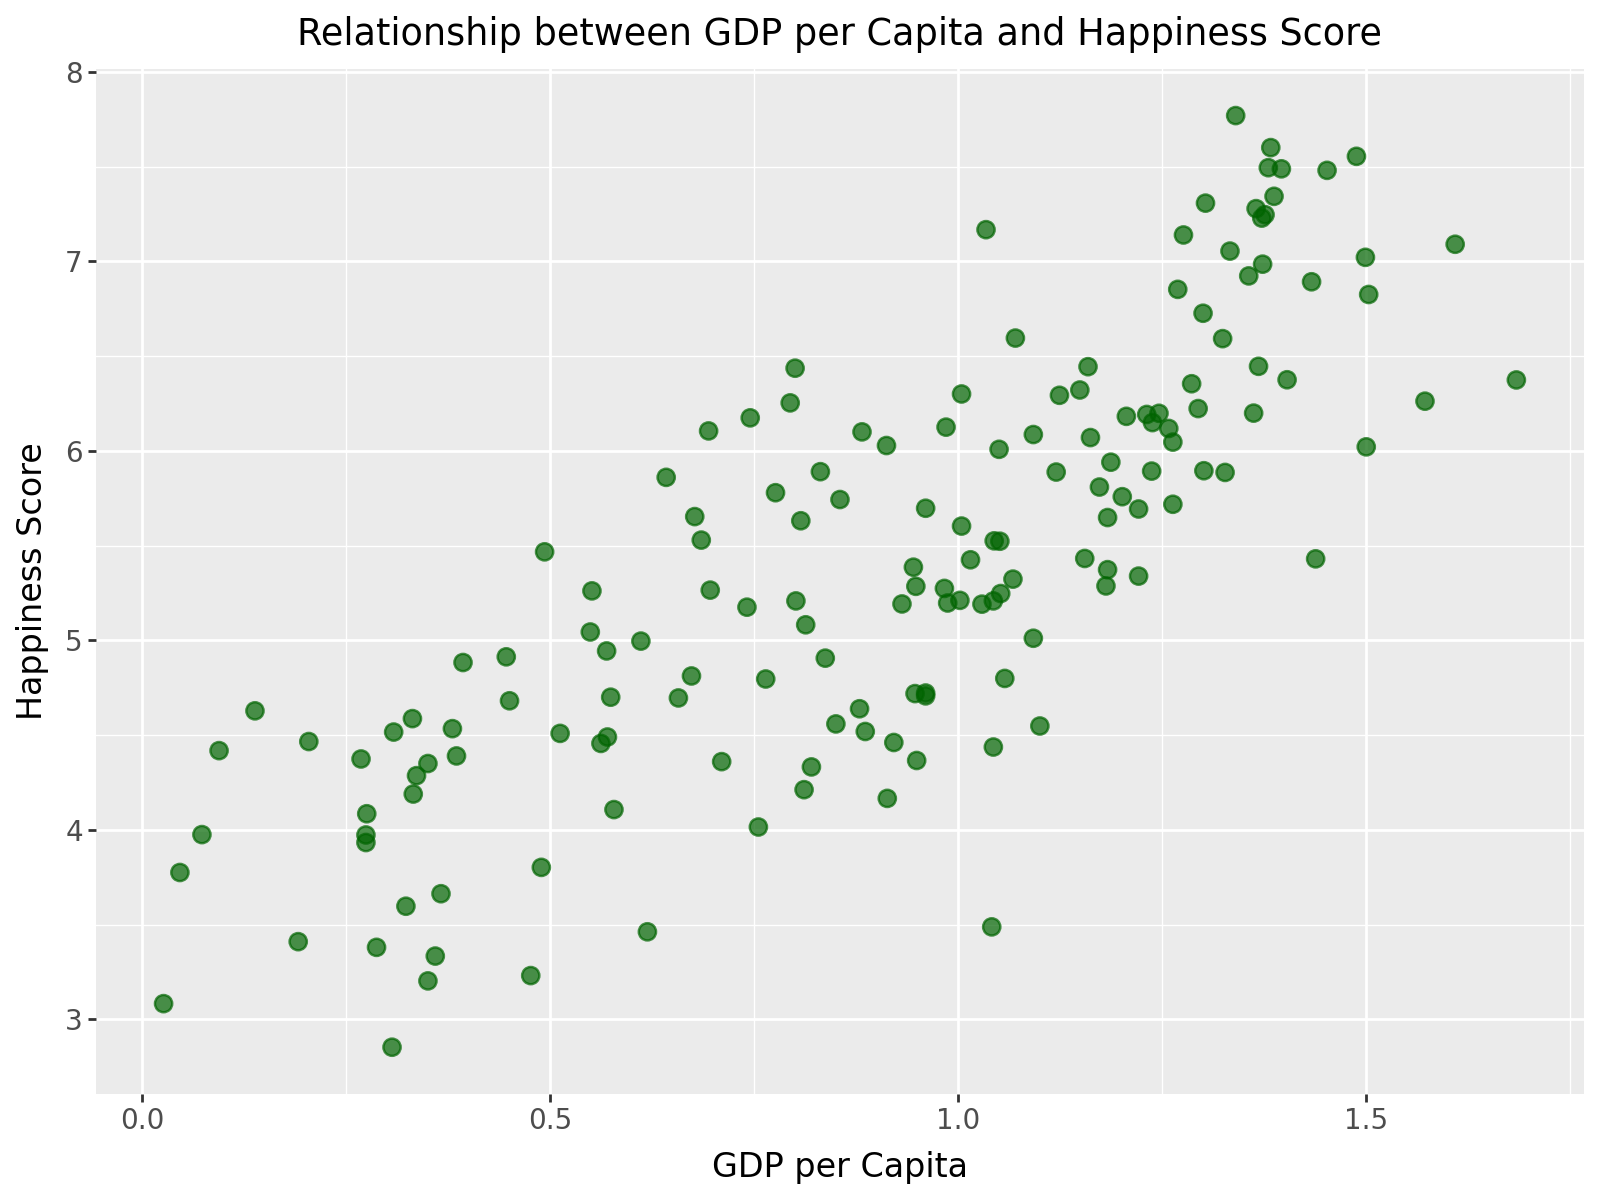

In [14]:
# Scatter plot showing relationship between GDP per capita and Happiness Score
(
    ggplot(df, aes(x='gdp_per_capita', y='score')) +
    geom_point(color='darkgreen', alpha=0.7, size=3) +  # Points with transparency and size
    labs(
        title='Relationship between GDP per Capita and Happiness Score',
        x='GDP per Capita',
        y='Happiness Score'
    ) +
    theme(
        figure_size=(8,6),
        axis_title=element_text(size=12),
        axis_text=element_text(size=10)
    )
)

<ipython-input-16-754c679ce017>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


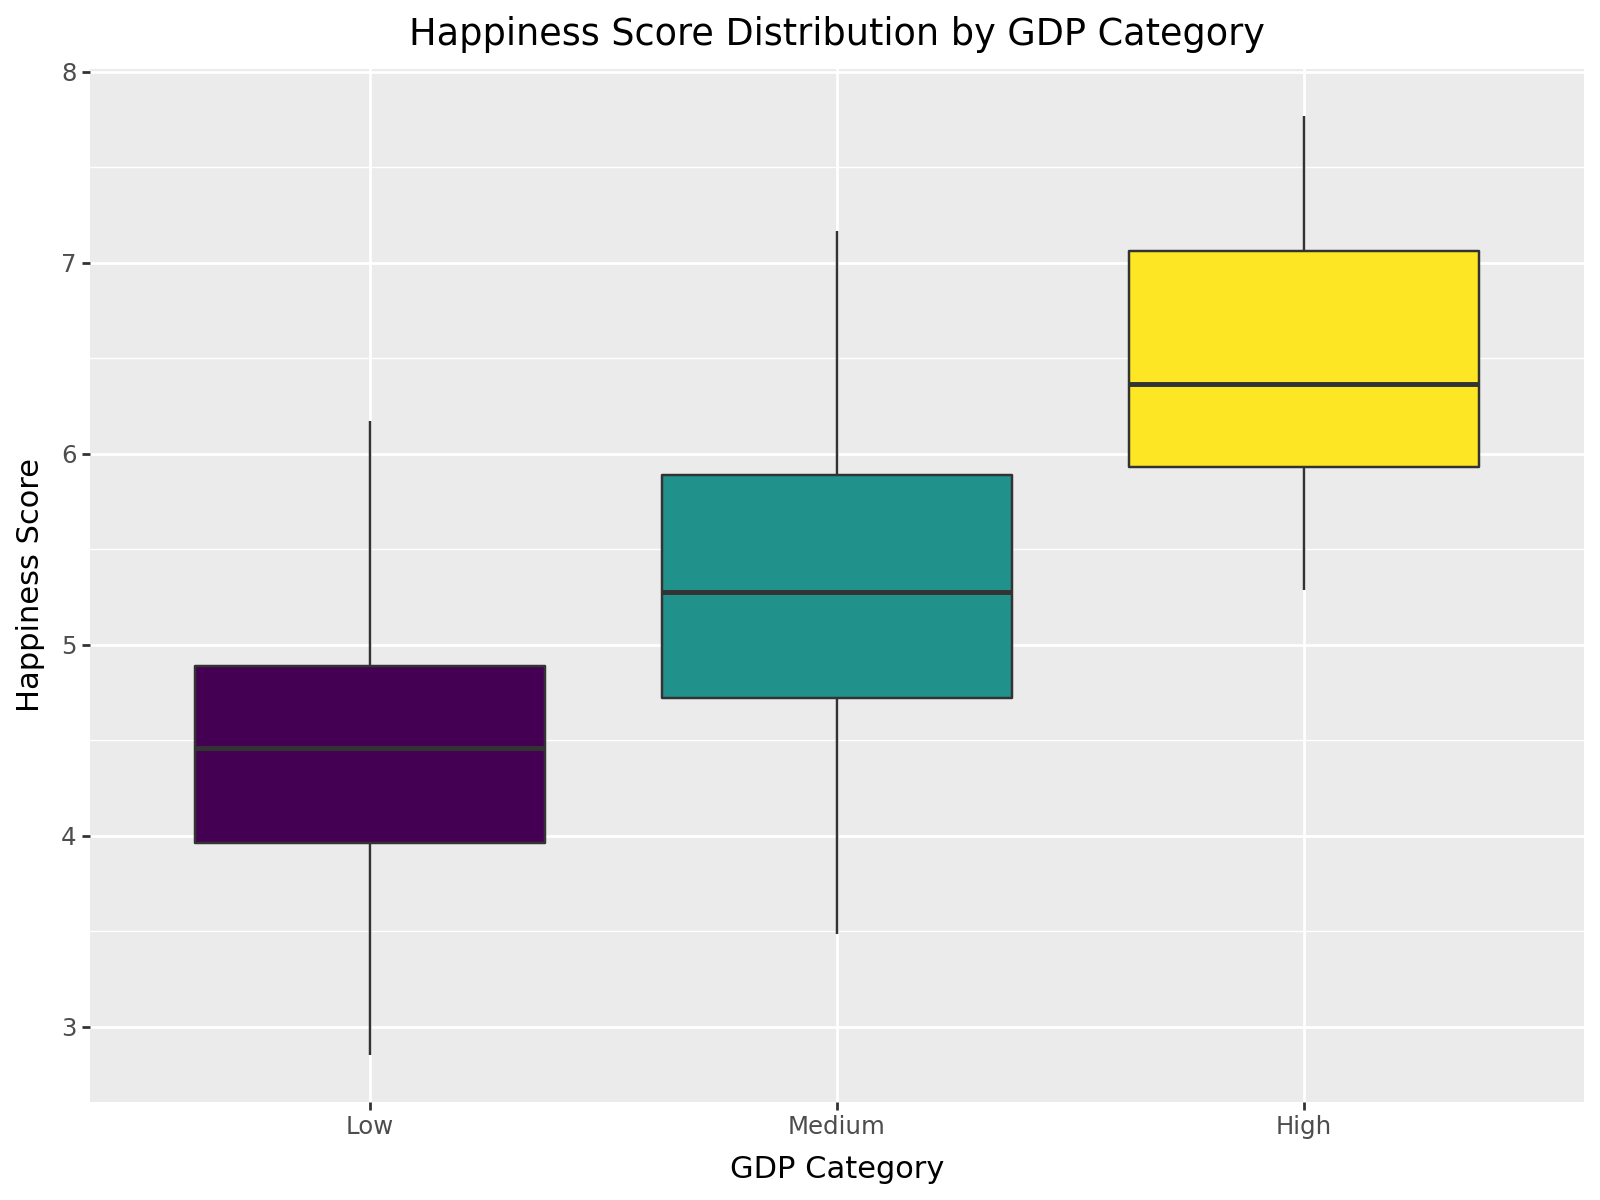

In [16]:
# Convert columns to numeric, forcing errors to NaN
cols_to_convert = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                   'freedom', 'generosity', 'corruption']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing GDP per capita
df = df.dropna(subset=['gdp_per_capita', 'score'])

# Create GDP categories based on tertiles (three groups)
df['gdp_category'] = pd.qcut(df['gdp_per_capita'], q=3, labels=['Low', 'Medium', 'High'])

# Plot boxplot of happiness scores by GDP category
(
    ggplot(df, aes(x='gdp_category', y='score', fill='gdp_category')) +
    geom_boxplot() +
    labs(
        title='Happiness Score Distribution by GDP Category',
        x='GDP Category',
        y='Happiness Score'
    ) +
    theme(
        figure_size=(8,6),
        legend_position='none'
    )
)


In [17]:
import plotly.express as px

# Select numeric columns for correlation calculation
numeric_cols = ['score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
                'freedom', 'generosity', 'corruption']

# Calculate the correlation matrix
corr = df[numeric_cols].corr()

# Create a heatmap of the correlation matrix using Plotly
fig = px.imshow(
    corr,
    text_auto=True,              # Show correlation coefficients on the heatmap
    aspect="auto",               # Automatic aspect ratio for better fit
    color_continuous_scale='RdBu_r',  # Diverging color scale (red to blue)
    title='Correlation Heatmap of World Happiness Factors'  # Title of the plot
)

# Display the heatmap
fig.show()

In [19]:
# Create an interactive choropleth map showing happiness scores by country
fig = px.choropleth(
    df,
    locations="country",            # Column with country names
    locationmode='country names',   # Specify that locations are country names
    color="score",                  # Color scale based on happiness score
    hover_name="country",           # Show country name on hover
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale
    title="Interactive World Map of Happiness Scores"   # Plot title
)

# Show the interactive map
fig.show()

In [21]:
# Create an interactive scatter plot with Plotly to explore relationships between factors
fig = px.scatter(
    df,
    x="healthy_life_expectancy",   # X-axis: healthy life expectancy
    y="freedom",                   # Y-axis: freedom to make life choices
    size="score",                  # Size of points corresponds to happiness score
    color="score",                 # Color points by happiness score for visual depth
    hover_name="country",          # Show country name on hover
    color_continuous_scale=px.colors.sequential.Viridis,  # Color scale
    title="Interactive Scatter Plot: Health vs Freedom with Happiness Scores"
)

fig.show()

In [22]:
# Bubble chart showing impact of social support and generosity on happiness score
fig = px.scatter(
    df,
    x='social_support',          # X-axis: social support
    y='generosity',              # Y-axis: generosity
    size='gdp_per_capita',       # Bubble size represents GDP per capita (proxy for population)
    color='score',               # Color by happiness score
    hover_name='country',        # Show country name on hover
    size_max=60,                 # Max bubble size for clarity
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Impact of Social Support and Generosity on Happiness Scores'
)

fig.show()

In [23]:
# Select relevant numerical columns for multi-variable analysis
columns_to_analyze = [
    'score',
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom',
    'generosity',
    'corruption'
]

# Create interactive scatter matrix plot
fig = px.scatter_matrix(
    df,
    dimensions=columns_to_analyze,
    color='score',  # Color points by happiness score for extra insight
    title='Interactive Pairwise Relationships Between Key Happiness Factors',
    labels={col: col.replace('_', ' ').title() for col in columns_to_analyze},
    color_continuous_scale=px.colors.sequential.Viridis,
    height=800,
    width=800
)

fig.update_traces(diagonal_visible=False)  # Hide histograms on diagonal for cleaner look
fig.show()

Insights and Interpretation

Happiness Scores Distribution:
The distribution of happiness scores across countries shows that Nordic countries such as Finland, Denmark, and Norway consistently rank highest. This aligns with expectations given their strong social support systems, high GDP per capita, and healthy life expectancy.

Economic Impact on Happiness:
The scatter plot between GDP per capita and happiness scores reveals a positive correlation — countries with higher economic wealth tend to report greater happiness. However, the relationship is not strictly linear, indicating that beyond a certain point, increases in GDP have diminishing returns on happiness.

Social Support and Generosity:
Bubble charts highlight the significant role of social support and generosity in contributing to higher happiness levels. Countries with stronger social networks and generosity scores often exhibit higher happiness even if GDP is moderate.

Corruption Perception and Freedom:
Countries perceived as less corrupt and with greater freedom to make life choices tend to have higher happiness scores. This suggests that good governance and individual freedoms are critical factors in societal wellbeing.

Unexpected Trends:
Some countries with moderate GDP but high social support and freedom score surprisingly well in happiness rankings, showing that economic factors alone do not determine happiness.

Limitations and Further Exploration:
Since I only analysed data 2019, temporal trends cannot be analyzed. Future work could include comparing multiple years to identify how changes in these factors influence happiness over time.